# Classification of 3s and 8s using Neural Network and Logistic Regression

In [14]:
#hide
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
#hide
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from mpl_toolkits import mplot3d

In [136]:
#hide
!pip install mnist

In [5]:
#hide
import mnist

In [6]:
#hide
train_images = mnist.train_images()
train_labels = mnist.train_labels()

EOFError: Compressed file ended before the end-of-stream marker was reached

In [139]:
#hide
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [140]:
#hide
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [141]:
#hide
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

9


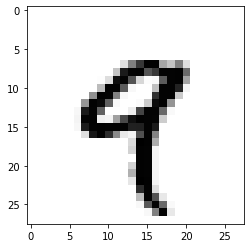

In [142]:
#hide
image_index = 4 
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys');

In [143]:
#hide
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]
y_train

array([3, 3, 3, ..., 8, 3, 8], dtype=uint8)

In [144]:
#hide
X_train = X_train/255.
X_test = X_test/255.

In [145]:
#hide
y_train1 = 1*(y_train==3)
y_test1 = 1*(y_test==3)
y_train1 = y_train1.reshape(-1,1)
y_test1 = y_test1.reshape(-1,1)

In [146]:
#hide
y_test1

array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]])

In [147]:
#hide
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

In [148]:
#hide
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

# Config class

In [149]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 220
config.bs = 50

# Importing Functions from kudzu library

In [150]:
from kudzu.data import Data, Sampler, Dataloader
from kudzu.layer import Affine, Sigmoid, Relu
from kudzu.loss import BCE
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import AccCallback, take_mean

In [151]:
#hide
layers = [Affine('first',784,100), Relu('first_Relu'), Affine('second',100,100), Relu('second_Relu'), Affine('third',100,2),Affine('fourth',2,1), Sigmoid('sigmoid')]

xavier
xavier
xavier
xavier


# ClfCallback class

In [152]:
acc = AccCallback
class CLfCallback(acc):
    def __init__(self,learner,bs):
        super().__init__(learner,bs)
        self.accuracies = []
        self.test_accuracies = []
    
    def epoch_end(self, train_prob, test_prob, predicted_test):
        for layer, name, fnval, grval in self.learner.model.params_and_grads():
            self.paramhist[layer.name+'_'+name].append(fnval)
            self.gradhist[layer.name+'_'+name].append(grval)
        eloss = take_mean(self.batch_losses[-self.bpe:], self.bpe, self.afrac)
        self.losses.append(eloss)
        self.accuracies.append(train_prob)
        self.test_accuracies.append(test_prob)
        self.predictions = np.array(predicted_test)
        if self.epoch % 10 ==0:
            print(f"Epoch {self.epoch} Loss {eloss}\n train accuracy: {train_prob} test accuracy: {test_prob}\n\n")
        

    

# Neural Network model

In [153]:
model = Model(layers)
data = Data(X_train, y_train1)
sampler = Sampler(data, config.bs, shuffle = True)
dl = Dataloader(data, sampler)
loss = BCE()
opt = GD(config.lr)


In [154]:
learner = Learner(loss, model, opt, config.num_epochs)
ccb = CLfCallback(learner, config.bs)
learner.set_callbacks([ccb])

# Loop training process begins

In [155]:
#hide_input
learner.train_loop(dl, X_test, y_test1)

Epoch 0 Loss 0.6944272896535906
 train accuracy: 0.5039225504924053 test accuracy: 0.5463709677419355


Epoch 10 Loss 0.23939719656220246
 train accuracy: 0.9281422133199799 test accuracy: 0.9430443548387096


Epoch 20 Loss 0.1349055195987402
 train accuracy: 0.9547654815556669 test accuracy: 0.9642137096774194


Epoch 30 Loss 0.11410356178922798
 train accuracy: 0.9620263728926723 test accuracy: 0.9672379032258065


Epoch 40 Loss 0.10385754069563094
 train accuracy: 0.9651977966950426 test accuracy: 0.967741935483871


Epoch 50 Loss 0.09660522049612413
 train accuracy: 0.9686195960607578 test accuracy: 0.967741935483871


Epoch 60 Loss 0.09075657548469941
 train accuracy: 0.971707561342013 test accuracy: 0.96875


Epoch 70 Loss 0.08563459041471377
 train accuracy: 0.9732098147220831 test accuracy: 0.969758064516129


Epoch 80 Loss 0.08119748672154196
 train accuracy: 0.9750459021866132 test accuracy: 0.969758064516129


Epoch 90 Loss 0.07696080785028994
 train accuracy: 0.976047404439

0.04152962350887603

In [156]:
max(ccb.accuracies), max(ccb.test_accuracies)

(0.9907361041562344, 0.9818548387096774)

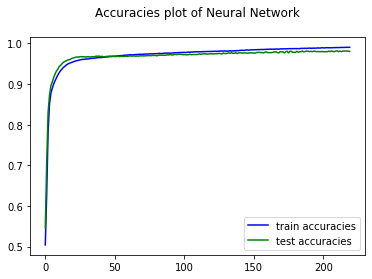

In [157]:
#hide_input
plt.plot(ccb.accuracies, 'b', label = 'train accuracies')
plt.plot(ccb.test_accuracies,'g', label = 'test accuracies')
plt.legend();
plt.title('Accuracies plot of Neural Network\n');

Text(0.5, 1.0, 'Losses plot of Neural Network')

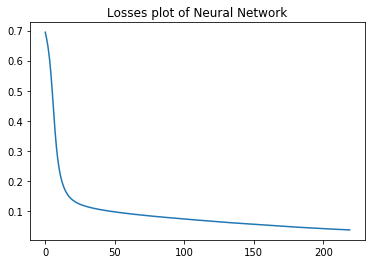

In [158]:
#hide_input
plt.plot(ccb.losses)
plt.title('Losses plot of Neural Network')

In [159]:
#hide
new_model = Model(layers[:-2])
inputs = new_model(X_test)
x1,x2 = np.meshgrid(inputs[:,0], inputs[:,1])
w1 = ccb.get_weights('fourth',0)[-1]
w2 = ccb.get_weights('fourth',1)[-1]
b = ccb.get_biases('fourth')[-1]

In [160]:
#hide
print(x1.max(), x1.min())
print(x2.max(), x2.min())

6.8061325268257304 -2.4013243392461496
8.856185693766474 -9.970505025157255


In [161]:
#hide
x1grid = np.linspace(-4,4,500)
x2grid = np.linspace(9,-6,500)
X1, X2 = np.meshgrid(x1grid, x2grid)
line = w1*X1 + w2*X2 +b
prob = layers[-1](line)

In [162]:
#hide
y_test.ravel()
b = np.argwhere(y_test ==3)
a = np.argwhere(y_test==8)

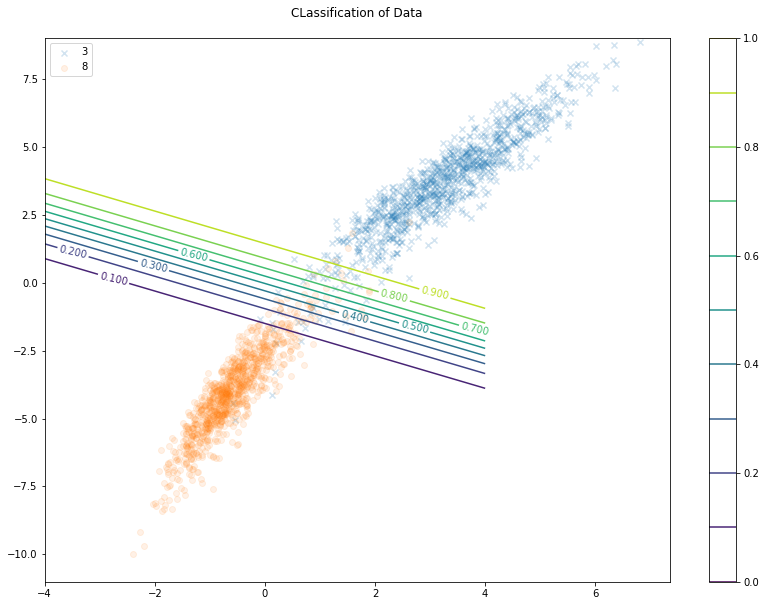

In [163]:
#hide_input
plt.figure(figsize=(14,10))
plt.scatter(inputs[:,0][b],inputs[:,1][b], marker = 'x', alpha = 0.2, label = '3')
plt.scatter(inputs[:,0][a],inputs[:,1][a], marker = 'o', alpha = 0.1, label = '8')
plt.legend(loc = 'upper left')
contours = plt.contour(X1, X2, prob,10)
plt.clabel(contours,inline = True, fontsize = 10);
plt.colorbar(contours);
plt.title('CLassification of Data\n');

# Confusion Matrix for Neural Network

In [177]:
#hide_input
matrix = confusion_matrix(y_test1,ccb.predictions)
print(f'Number of False positives: {matrix[0,1]}\n')
print(f'Number of False negatives: {matrix[1,0]}')

Number of False positives: 18

Number of False negatives: 21


# Logistic Regression model

In [165]:
#hide
layers_logistic = [Affine('logistic_aff',784,1),Sigmoid('sigmoid_aff')]
logistic_model = Model(layers_logistic)
learner_logistic = Learner(loss, logistic_model, opt, config.num_epochs)
ccb_logistic = CLfCallback(learner_logistic, config.bs)
learner_logistic.set_callbacks([ccb_logistic])

xavier


In [166]:
#hide_input
learner_logistic.train_loop(dl, X_test, y_test1)

Epoch 0 Loss 0.5758797964350444
 train accuracy: 0.7598898347521282 test accuracy: 0.8830645161290323


Epoch 10 Loss 0.2597958623455349
 train accuracy: 0.9304790519112002 test accuracy: 0.9400201612903226


Epoch 20 Loss 0.20838484969722457
 train accuracy: 0.9410782840928059 test accuracy: 0.9490927419354839


Epoch 30 Loss 0.1843124101780231
 train accuracy: 0.9455015857119012 test accuracy: 0.9566532258064516


Epoch 40 Loss 0.1698651058356312
 train accuracy: 0.9480887998664663 test accuracy: 0.9596774193548387


Epoch 50 Loss 0.1600326013759786
 train accuracy: 0.9515940577532966 test accuracy: 0.9621975806451613


Epoch 60 Loss 0.15283259364441443
 train accuracy: 0.9535970622600568 test accuracy: 0.9637096774193549


Epoch 70 Loss 0.14728390986482529
 train accuracy: 0.9548489400767819 test accuracy: 0.9647177419354839


Epoch 80 Loss 0.14284384063478048
 train accuracy: 0.956601569020197 test accuracy: 0.9647177419354839


Epoch 90 Loss 0.13918969750902457
 train accuracy: 0.

0.2850757121976477

In [167]:
max(ccb_logistic.accuracies), max(ccb_logistic.test_accuracies)

(0.9635286262727425, 0.9682459677419355)

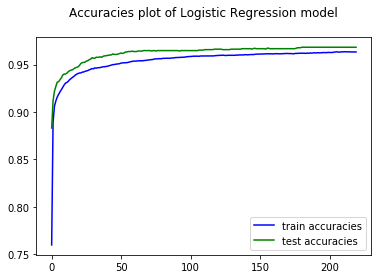

In [168]:
#hide_input
plt.plot(ccb_logistic.accuracies, 'b', label = 'train accuracies')
plt.plot(ccb_logistic.test_accuracies,'g', label = 'test accuracies')
plt.legend();
plt.title('Accuracies plot of Logistic Regression model\n');

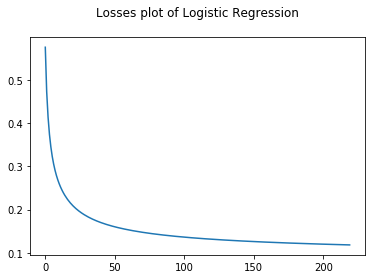

In [170]:
#hide_input
plt.plot(ccb_logistic.losses)
plt.title('Losses plot of Logistic Regression\n');

By these plots we can observe that when performing logistic regression instead of Neural network, our accuracy is less in logistic regression but overfitting doesn't seem to happen in logistic regression

# Confusion Matrix for Logistic Regression

In [171]:
#hide_input
confusion_matrix(y_test1, ccb_logistic.predictions)

array([[940,  34],
       [ 29, 981]], dtype=int64)